# Inserción en Árboles Rojo-Negro

Los árboles Rojo-Negro son una forma de árbol binario de búsqueda balanceado. Cada nodo del árbol tiene un color asignado, rojo o negro, que ayuda a mantener el árbol equilibrado durante las inserciones y eliminaciones. La inserción en estos árboles sigue reglas específicas para preservar el balance y las propiedades que definen a los árboles Rojo-Negro:

- Cada nodo es rojo o negro.
- La raíz siempre es negra.
- Todos las hojas (NIL) son negras.
- Si un nodo es rojo, entonces ambos hijos deben ser negros (no pueden haber dos nodos rojos seguidos en un camino desde la raíz a una hoja).
- Todos los caminos desde un nodo a sus hojas descendientes contienen el mismo número de nodos negros.

La inserción de un nuevo nodo en un árbol Rojo-Negro comienza como en un árbol binario de búsqueda: el nodo se inserta en la posición que correspondería en un árbol binario de búsqueda y, inicialmente, se colorea de rojo. Posteriormente, se realizan una serie de rotaciones y recoloreados para restaurar las propiedades de los árboles Rojo-Negro.

## Implementación en Python

La implementación de la inserción en árboles Rojo-Negro en Python puede comenzar con la definición de la estructura del nodo y del propio árbol:

In [1]:
# Código utilitario
from src.visualization import visualize_rbtree

In [2]:
# %load src/RBTree.py

class Node:
    # Constructor para el nodo
    def __init__(self, data, color="red"):
        self.data = data
        self.color = color
        self.parent = None
        self.left = None
        self.right = None

class RBTree:
    # Constructor para el árbol rojo-negro
    def __init__(self):
        self.NIL = Node(data=None, color="black")
        self.root = self.NIL

El siguiente paso es implementar el método de inserción. Este método debe insertar el nodo en el árbol y luego llamar a una función de reparación para asegurar que se mantengan las propiedades de los árboles Rojo-Negro:

In [3]:
# Método para insertar un nuevo nodo
def insert(self, data):
    new_node = Node(data)
    new_node.left = self.NIL
    new_node.right = self.NIL

    parent = None
    current = self.root

    # Búsqueda del lugar adecuado para la inserción
    while current != self.NIL:
        parent = current
        if new_node.data < current.data:
            current = current.left
        else:
            current = current.right

    new_node.parent = parent

    # Determinación de la posición del nuevo nodo dentro del árbol
    if parent is None:
        self.root = new_node
    elif new_node.data < parent.data:
        parent.left = new_node
    else:
        parent.right = new_node

    # Establecer el color inicial del nuevo nodo a rojo
    new_node.color = "red"
    # Llamar al método para corregir la inserción
    self.fix_insert(new_node)

RBTree.insert = insert

El método `fix_insert` es el encargado de realizar las rotaciones y recoloreados necesarios para mantener las propiedades del árbol. Este método puede ser bastante extenso y varía según el caso específico que se esté manejando (p. ej., inserción en diferentes posiciones relativas al nodo padre y abuelo). Ver [`RBTree`](src/RBTree.py) para referencia. 

In [4]:
# Método para corregir las propiedades después de la inserción
def fix_insert(self, new_node):
    # Mientras que no se llegue a la raíz y el padre sea rojo
    while new_node != self.root and new_node.parent.color == "red":

        # Si el padre es hijo izquierdo
        if new_node.parent == new_node.parent.parent.left:
            uncle = new_node.parent.parent.right
            # Caso 1
            if uncle.color == "red":
                new_node.parent.color = "black"
                uncle.color = "black"
                new_node.parent.parent.color = "red"
                new_node = new_node.parent.parent
            else:
                # Caso 2: si el nuevo nodo es el hijo derecho
                if new_node == new_node.parent.right:
                    new_node = new_node.parent
                    self.left_rotate(new_node)
                # Caso 3
                new_node.parent.color = "black"
                new_node.parent.parent.color = "red"
                self.right_rotate(new_node.parent.parent)
        else:
            # Los mismos casos pero con el padre siendo hijo derecho
            uncle = new_node.parent.parent.left
            # Caso 1
            if uncle.color == "red":
                new_node.parent.color = "black"
                uncle.color = "black"
                new_node.parent.parent.color = "red"
                new_node = new_node.parent.parent
            else:
                # Caso 2: si el nuevo nodo es el hijo izquierdo
                if new_node == new_node.parent.left:
                    new_node = new_node.parent
                    self.right_rotate(new_node)
                # Caso 3
                new_node.parent.color = "black"
                new_node.parent.parent.color = "red"
                self.left_rotate(new_node.parent.parent)

    # Aseguramos que la raíz siempre sea negra
    self.root.color = "black"

# Método para realizar rotación izquierda
def left_rotate(self, node):
    # Establecer y como el hijo derecho del nodo actual
    y = node.right
    # Trasladar el hijo izquierdo de y al hijo derecho de node
    node.right = y.left
    if y.left != self.NIL:
        # Si el hijo izquierdo de y no es NIL, actualizar su padre
        y.left.parent = node
    # Hacer que el padre de y sea el padre de node
    y.parent = node.parent
    if node.parent is None:
        # Si node es la raíz, hacer a y la nueva raíz
        self.root = y
    elif node == node.parent.left:
        # Si node es hijo izquierdo, actualizar el hijo izquierdo de su
        # padre a y
        node.parent.left = y
    else:
        # Si node es hijo derecho, actualizar el hijo derecho de su
        # padre a y
        node.parent.right = y
    # Colocar node a la izquierda de y
    y.left = node
    # Hacer que el padre de node sea y
    node.parent = y

# Método para realizar rotación derecha
def right_rotate(self, node):
    # Establecer x como el hijo izquierdo del nodo actual
    x = node.left
    # Trasladar el hijo derecho de x al hijo izquierdo de node
    node.left = x.right
    if x.right != self.NIL:
        # Si el hijo derecho de x no es NIL, actualizar su padre
        x.right.parent = node
    # Hacer que el padre de x sea el padre de node
    x.parent = node.parent
    if node.parent is None:
        # Si node es la raíz, hacer a x la nueva raíz
        self.root = x
    elif node == node.parent.right:
        # Si node es hijo derecho, actualizar el hijo derecho de su
        # padre a x
        node.parent.right = x
    else:
        # Si node es hijo izquierdo, actualizar el hijo izquierdo de su
        # padre a x
        node.parent.left = x
    # Colocar node a la derecha de x
    x.right = node
    # Hacer que el padre de node sea x
    node.parent = x

RBTree.fix_insert = fix_insert
RBTree.left_rotate = left_rotate
RBTree.right_rotate = right_rotate


## Pruebas de Inserción en Árboles Rojo-Negro

Para probar la inserción, podemos insertar varios valores y luego verificar la estructura y colores del árbol resultante:

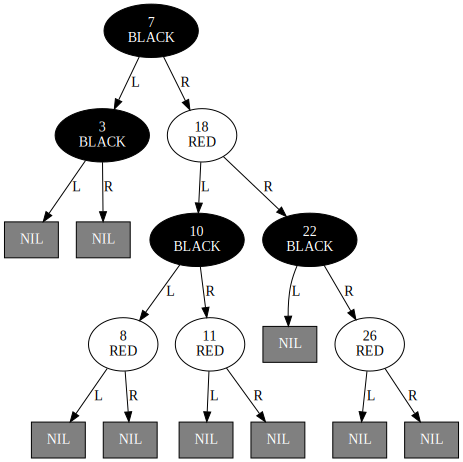

In [5]:
rb_tree = RBTree()
values = [7, 3, 18, 10, 22, 8, 11, 26]
for val in values:
    rb_tree.insert(val)

# Visualizar el árbol
dot = visualize_rbtree(rb_tree)
display(dot)

## Complejidad del Algoritmo

- **Complejidad de tiempo:** La inserción en un árbol Rojo-Negro, incluida la reparación posterior a la inserción, tiene una complejidad de tiempo promedio y en el peor de los casos de \(O(\log n)\), donde \(n\) es el número de nodos en el árbol. Esto se debe a que la altura del árbol se mantiene logarítmica respecto al número de nodos.
- **Complejidad del espacio:** La inserción tiene una complejidad de espacio de \(O(1)\), asumiendo que la reparación no utiliza espacio adicional significativo más allá de unas pocas variables temporales.

## Ejercicios Prácticos

1. Implementa el método `fix_insert` para completar la inserción en árboles Rojo-Negro. Considera los diferentes casos que pueden ocurrir tras la inserción de un nodo rojo.
2. Escribe una función para verificar si un árbol cumple con las propiedades de los árboles Rojo-Negro después de varias inserciones.

## Soluciones a los Ejercicios

La implementación detallada del método `fix_insert` y la función de verificación requerirían un análisis profundo de los casos específicos de inserción y las rotaciones necesarias para mantener el árbol balanceado, lo cual es un ejercicio avanzado y muy educativo sobre estructuras de datos complejas.